In [1]:
# -*- coding: utf-8 -*-
"""
@Author: Jiayi Chen
Created on Nov. 21, 2023
Last modified on Nov. 30, 2023

Verify when does the central limit theorem hold for the Poisson distribution.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import Image
from scipy.stats import chi2
%matplotlib widget

In [2]:
params={
        # 'axes.labelsize':20,
        # 'xtick.labelsize':'large',
        # 'ytick.labelsize':'large',
        'xtick.direction':'in',
        'ytick.direction':'in',
        'xtick.minor.visible':True,
        'ytick.minor.visible':True,
        'xtick.top':True,
        'ytick.right':True,
        'xtick.labeltop':False,
        'ytick.labelright':False,
        'xtick.labelbottom':True,
        'ytick.labelleft':True,
        # 'xtick.major.size':10,
        # 'ytick.major.size':10,
        # 'xtick.minor.size':5,
        # 'ytick.minor.size':5,
        # 'xtick.major.width':1.5,
        # 'ytick.major.width':1.5,
        # 'xtick.minor.width':1,
        # 'ytick.minor.width':1,
        # 'errorbar.capsize':3,
        # 'legend.fontsize':'xx-large',
        'font.family':'serif',
        'mathtext.default':'it',
        'figure.subplot.wspace':0}
plt.rcParams.update(params)

## Poisson distribution and normal distribution

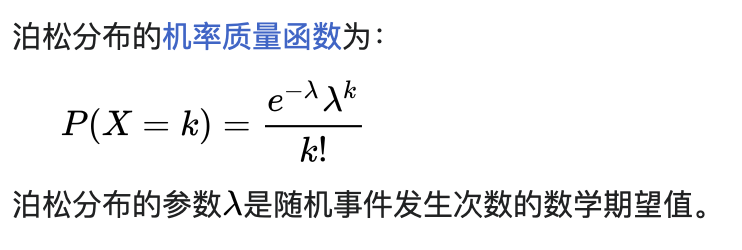

In [3]:
Image("/Users/joey/Documents/Codes/Chandra/Images/poisson_distribution.png", width=500)

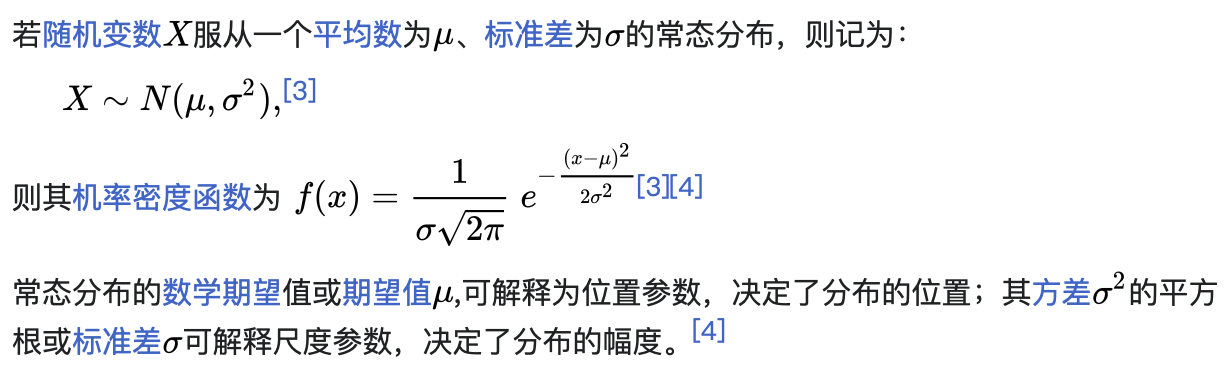

In [4]:
Image("/Users/joey/Documents/Codes/Chandra/Images/normal_distribution.png", width=800)

/var/folders/jc/gxyqx23s6nv7n2znb663qk5r0000gn/T/ipykernel_39920/1831785371.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y1=np.exp(-lamb)*lamb**x/np.math.factorial(x)
/var/folders/jc/gxyqx23s6nv7n2znb663qk5r0000gn/T/ipykernel_39920/1831785371.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lamb_probability=pd.concat([lamb_probability,lamb_probability_temp],ignore_index=True)
/var/folders/jc/gxyqx23s6nv7n2znb663qk5r0000gn/T/ipykernel_39920/1831785371.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y1=np.

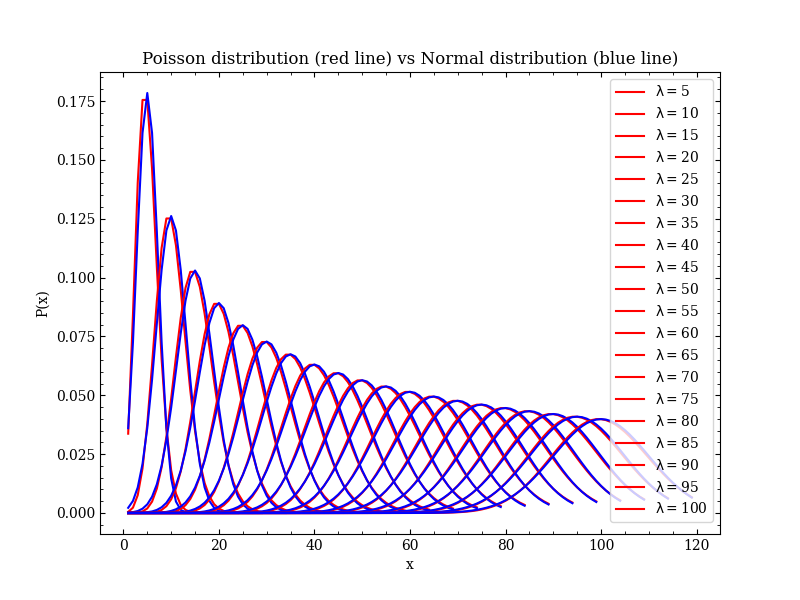

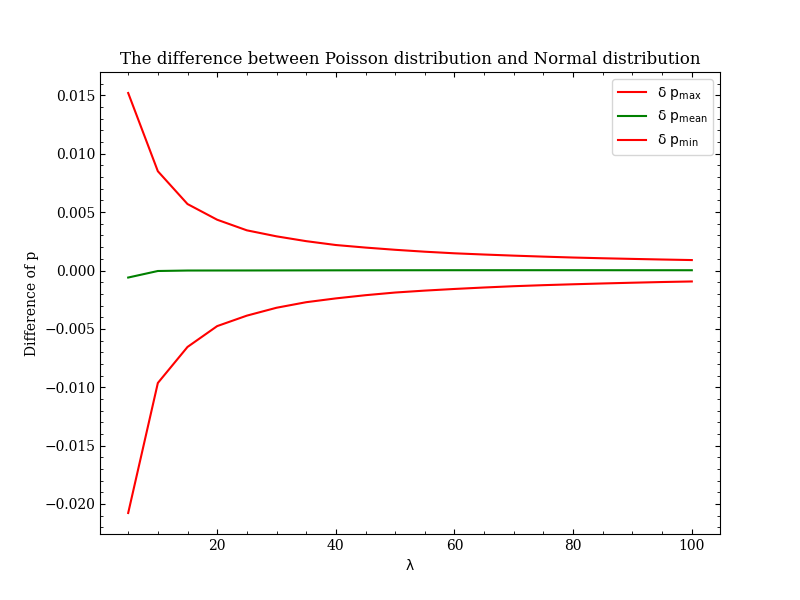

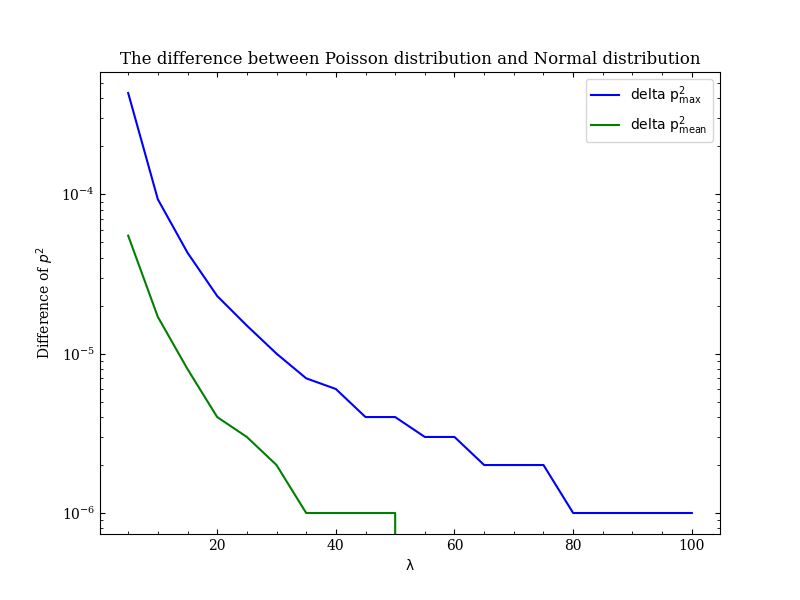

In [10]:
fig, ax=plt.subplots(1,1,figsize=(8,6))
lamb_probability=pd.DataFrame(columns=['lambda','deltap-max','deltap-mean','deltap-min','deltap2-mean','deltap2-max'])
max_p_poisson=[]
max_p_normal=[]
max_x_poisson=[]
max_x_normal=[]
for lamb in range(5,105,5):
    p1=[]
    p2=[]
    for x in range(1,lamb+20):
        y1=np.exp(-lamb)*lamb**x/np.math.factorial(x)
        p1.append(y1)
        y2=np.exp(-(x-lamb)**2/2/lamb)/np.sqrt(2*np.pi*lamb)
        p2.append(y2)
    deltap=[p2[i]-p1[i] for i in range(len(p1))]
    deltap2=[(p2[i]-p1[i])**2 for i in range(len(p1))]
    deltapmin=round(min(deltap),6)
    deltapmax=round(max(deltap),6)
    deltapmean=round(np.mean(deltap),6)
    # deltap2min=round(min(deltap2),6)
    deltap2max=round(max(deltap2),6)
    deltap2mean=round(np.mean(deltap2),6)
    max_prob_poisson=max(p1)
    max_prob_normal=max(p2)
    max_p_poisson.append(max_prob_poisson)
    max_p_normal.append(max_prob_normal)
    index_poisson=p1.index(max_prob_poisson)
    index_normal=p2.index(max_prob_normal)
    max_x_poisson.append(range(1,lamb+20)[index_poisson])
    max_x_normal.append(range(1,lamb+20)[index_normal])

    # print('lambda=',lamb,'deltap-max=',deltapmax,'deltap-min=',deltapmin,'deltap2-max=',deltap2max,'deltap2-min=',deltap2min)
    lamb_probability_temp=pd.DataFrame({'lambda':lamb,'deltap-max':deltapmax,'deltap-mean':deltapmean,'deltap-min':deltapmin,'deltap2-max':deltap2max,'deltap2-mean':deltap2mean},index=[0])
    lamb_probability=pd.concat([lamb_probability,lamb_probability_temp],ignore_index=True)
    ax.plot(range(1,lamb+20),p1,'r',label='$\mathrm{\lambda=}$'+str(lamb))
    ax.plot(range(1,lamb+20),p2,'b')

plt.title('Poisson distribution (red line) vs Normal distribution (blue line)')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()
plt.savefig('poisson_distribution_vs_normal_distribution.png',dpi=300)

fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(lamb_probability['lambda'],lamb_probability['deltap-max'],'r',label='$\mathrm{\delta~p_{max}}$')
ax.plot(lamb_probability['lambda'],lamb_probability['deltap-mean'],'g',label='$\mathrm{\delta~p_{mean}}$')
ax.plot(lamb_probability['lambda'],lamb_probability['deltap-min'],'r',label='$\mathrm{\delta~p_{min}}$')
plt.title('The difference between Poisson distribution and Normal distribution')
plt.xlabel('$\mathrm{\lambda}$')
plt.ylabel('Difference of p')
plt.legend()
plt.show()
plt.savefig('difference_p.png')

fig, ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(lamb_probability['lambda'],lamb_probability['deltap2-max'],'b',label='$\mathrm{delta~p^2_{max}}$')
ax.plot(lamb_probability['lambda'],lamb_probability['deltap2-mean'],'g',label='$\mathrm{delta~p^2_{mean}}$')
# plt.plot(lamb_probability['lambda'],lamb_probability['deltap2-min'],'b',label='$\mathrm{delta~p^2_{min}}$')
plt.yscale('log')
plt.title('The difference between Poisson distribution and Normal distribution')
plt.xlabel('$\mathrm{\lambda}$')
plt.ylabel('Difference of $p^2$')
plt.legend()
plt.show()
plt.savefig('difference_p2.png',dpi=300)

/opt/homebrew/lib/python3.11/site-packages/matplotlib/table.py:809: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=cellText[row][col],


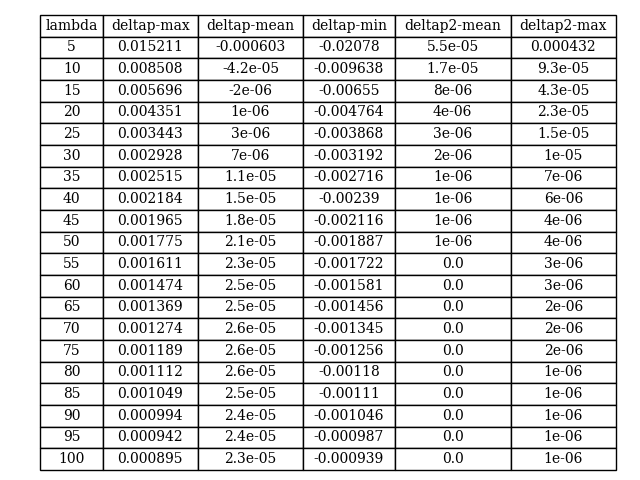

In [13]:
fig, ax =plt.subplots(1,1)

cell_text = []
for row in range(len(lamb_probability)):
    cell_text.append(lamb_probability.iloc[row])

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=cell_text, colLabels=lamb_probability.columns, cellLoc = 'center', loc='center')

# 设置表格字体
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_style('normal')

the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(2, 1.3)
the_table.auto_set_column_width(col=list(range(len(lamb_probability.columns))))
# # for key, cell in the_table.get_celld().items():
# #     if key[0] in [1, 3]:  # 只去掉第1行和第3行的分隔线
# #         cell.set_edgecolor('white')
# # # for key, cell in the_table.get_celld().items():
# # #     cell.set_edgecolor('white')

plt.savefig('lamb_probability_table.png',dpi=300)

/var/folders/jc/gxyqx23s6nv7n2znb663qk5r0000gn/T/ipykernel_12112/438212688.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax =plt.subplots(1,1)
/opt/homebrew/lib/python3.11/site-packages/matplotlib/table.py:809: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=cellText[row][col],


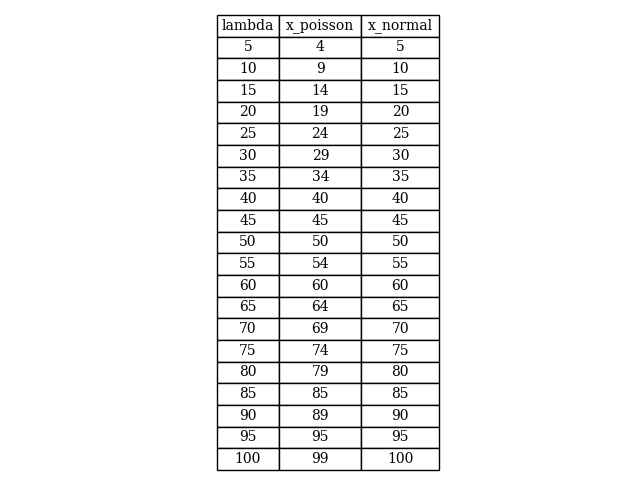

In [15]:
lamb_x_poisson_normal=pd.DataFrame({'lambda':range(5,105,5),'x_poisson':max_x_poisson,'x_normal':max_x_normal})

fig, ax =plt.subplots(1,1)

cell_text = []
for row in range(len(lamb_x_poisson_normal)):
    cell_text.append(lamb_x_poisson_normal.iloc[row])

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=cell_text, colLabels=lamb_x_poisson_normal.columns, cellLoc = 'center', loc='center')

# 设置表格字体
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_style('normal')

the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(2, 1.3)
the_table.auto_set_column_width(col=list(range(len(lamb_x_poisson_normal.columns))))

plt.savefig('lamb_x_poisson_normal_table.png',dpi=300)

## Chi-square distribution

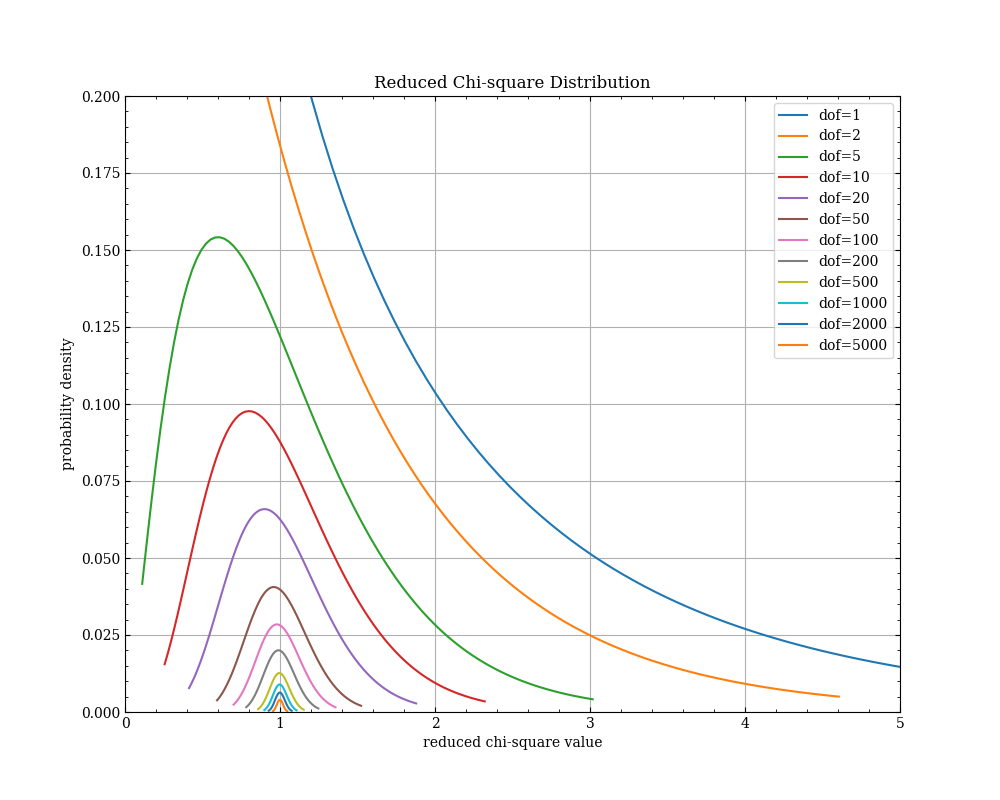

In [32]:
# 定义自由度
dof=[]
for i in range(4):
    dof.append(1*10**i)
    dof.append(2*10**i)
    dof.append(5*10**i)

y_max_list=[]
x_max_list=[]
reduced_chi_square=[]
plt.figure(figsize=(10, 8))
for f in dof:
    # 定义x轴的范围)
    x = np.linspace(chi2.ppf(0.01, f), chi2.ppf(0.99, f), 100)

    # 计算卡方分布的概率密度函数
    y = chi2.pdf(x, f)
    y_max=max(y)
    y_max_list.append(y_max)
    index_max=y.tolist().index(y_max)
    x_max=x[index_max]
    x_max_list.append(round(x_max,3))
    reduced_chi_square.append(round(x_max/f,3))

    # 绘制卡方分布
    plt.plot(x/f, y, label=f'dof={f}')
    plt.xlim(0, 5)
    plt.ylim(0, 0.2)
    # plt.yscale('log')
    plt.title('Reduced Chi-square Distribution')
    plt.xlabel('reduced chi-square value')
    plt.ylabel('probability density')
    plt.legend()
    plt.grid(True)
    plt.savefig('Reduced_Chi_square Distribution.png',dpi=300)

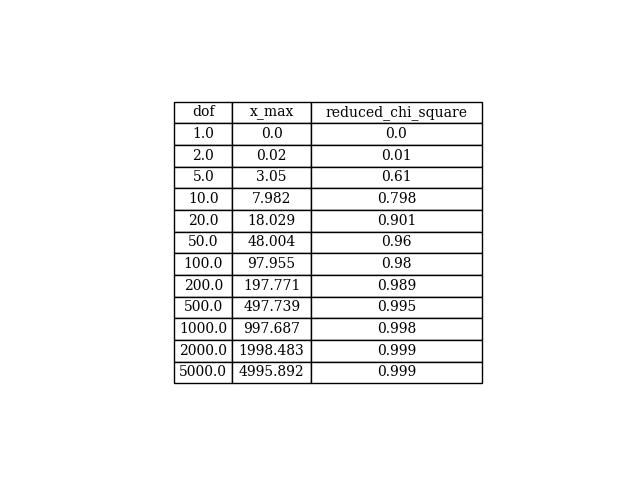

In [38]:
dof_chi_square=pd.DataFrame({'dof':dof,'x_max':x_max_list,'reduced_chi_square':reduced_chi_square})

fig, ax =plt.subplots(1,1)

cell_text = []
for row in range(len(dof_chi_square)):
    cell_text.append(dof_chi_square.iloc[row])

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=cell_text, colLabels=dof_chi_square.columns, cellLoc = 'center', loc='center')

# 设置表格字体
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_style('normal')

the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(2, 1.3)
the_table.auto_set_column_width(col=list(range(len(dof_chi_square.columns))))

plt.savefig('dof_chi_square_table.png',dpi=300)